In [1]:
from FactorSet import *
from gp_update_function import *
from InitStrategies import *
from PlotWrapper import *
from plan_next_experiment import *
import matplotlib.pyplot as plt
from plot_heatmaps import *
from sklearn.gaussian_process.kernels import RBF

In [2]:
#create a FactorSet class
my_factors = FactorSet()
my_factors.add_categorical(name="projectile", levels=["pingpong", "whiffle"])
my_factors.add_continuous(name="draw_angle", minimum=0, maximum=180)
my_factors.add_ordinal(name="rubber_bands", levels=[1, 2, 3])
create_new=False

In [3]:
#if create_new=True, create new samples
#else just import the samples
if create_new:
    X_LHS = latin_hypercube_design(my_factors,6)
    X_maximin = maximin_design(my_factors,6)
    X_random = random_design(my_factors,6)
else:
    X_LHS = pd.read_csv("LHS_Sample_Design_6Points.csv")
    X_maximin = pd.read_csv("Maximin_Sample_Design_6Points.csv")
    X_random = pd.read_csv("Random_Sample_Design_6Points.csv")

In [4]:
kernel = RBF()
gp = GaussianProcessRegressor(kernel)
X_LHS

,draw_angle,projectile,rubber_bands
0,165.0,pingpong,2.0
1,75.0,whiffle,3.0
2,135.0,whiffle,2.0
3,15.0,pingpong,1.0
4,45.0,whiffle,3.0
5,105.0,pingpong,1.0


In [5]:
#record "responses"
y = [0.5, 1.3, 1.6, 1.7, 1.5, 1.2]

In [6]:
#train the GP on X_maximin and y
gp = train_model(gp,X_LHS,y,my_factors)
optimized_kernel = gp.kernel_
optimized_kernel

RBF(length_scale=1.56)

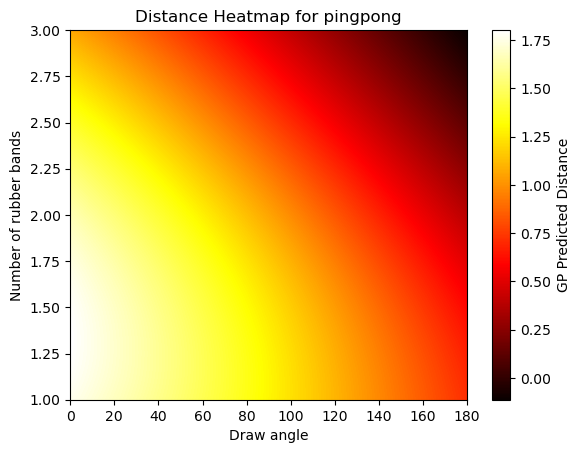

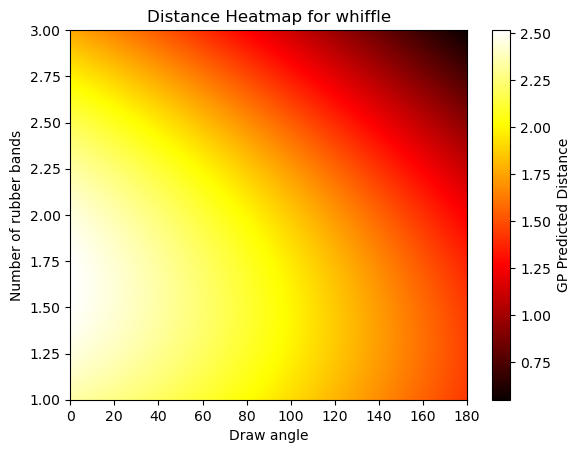

In [7]:
distance_heatmaps(gp,my_factors)

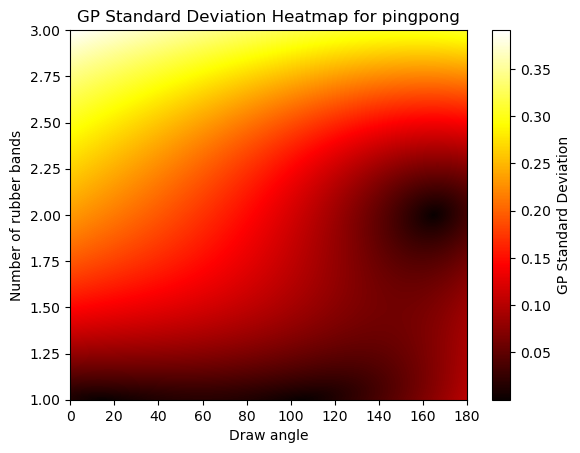

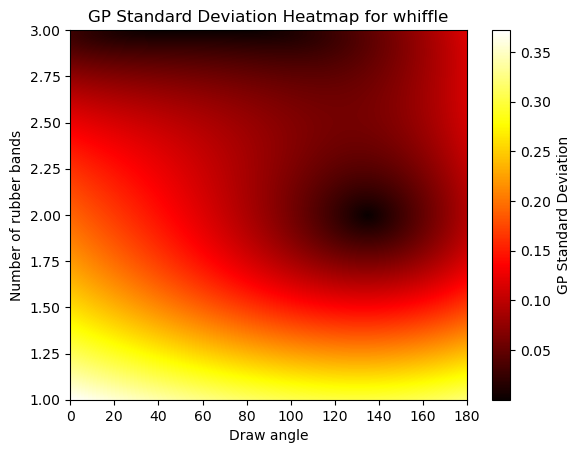

In [8]:
uncertainty_heatmaps(gp,my_factors)

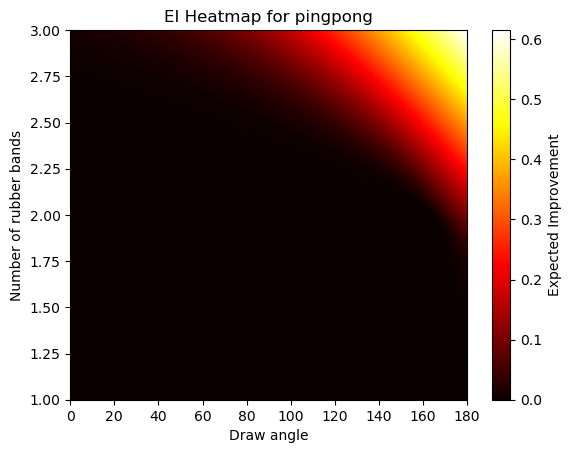

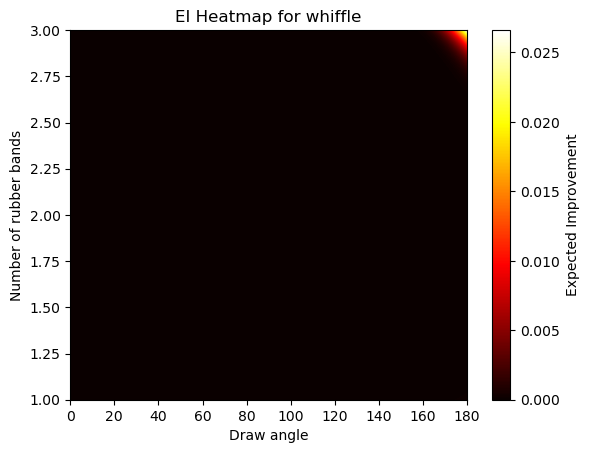

In [9]:
EI_heatmaps(gp,my_factors)

In [11]:
next_experiment_EI, obj_val = plan_next_experiment(gp, my_factors, "EI")

In [12]:
next_experiment_EI

,draw_angle,projectile,rubber_bands
0,180.0,pingpong,3.0


In [13]:
obj_val

0.6150828072206648

In [8]:
factor_names = [factor[0] for factor in my_factors.factors]
#use this block of code to make gp predictions to ensure heatmaps are correct
#order here: draw_angle, projectile, rubber_bands
point_to_test_df = pd.DataFrame([(180.0, "pingpong", 3.0)], columns=factor_names)
model_predict(gp,point_to_test_df,my_factors)

(array([-0.11240716]), array([0.30759414]))

In [14]:
#want to suggest next experiment, let's say with exploration
next_experiment_exploration, obj_val = plan_next_experiment(gp,my_factors, "Exploration")

In [15]:
next_experiment_exploration

,draw_angle,projectile,rubber_bands
0,0.0,pingpong,3.0


# collect data on this experiment, then update the model and see the updated heatmap

In [14]:
y_new = 5 #inches
update_model(gp,next_experiment_exploration,y_new,my_factors)

GaussianProcessRegressor(kernel=RBF(length_scale=1), optimizer=None)

In [15]:
gp.X_train_

array([[0.91666667, 0.        , 1.        ],
       [0.41666667, 1.        , 2.        ],
       [0.75      , 1.        , 1.        ],
       [0.08333333, 0.        , 0.        ],
       [0.25      , 1.        , 2.        ],
       [0.58333333, 0.        , 0.        ],
       [0.        , 0.        , 2.        ]])

In [16]:
gp.y_train_

array([0.5, 1.3, 1.6, 1.7, 1.5, 1.2, 5. ])

Right before the prediction
After the prediction
Before plotting for one projectile


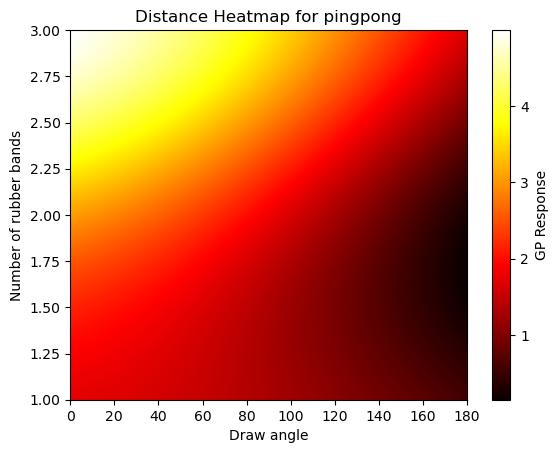

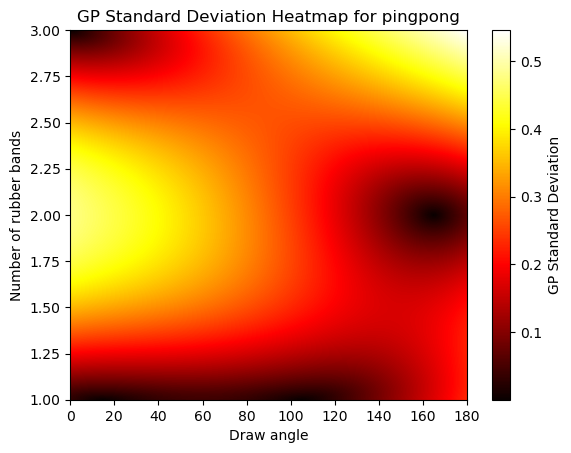

After plotting for one projectile
Right before the prediction
After the prediction
Before plotting for one projectile


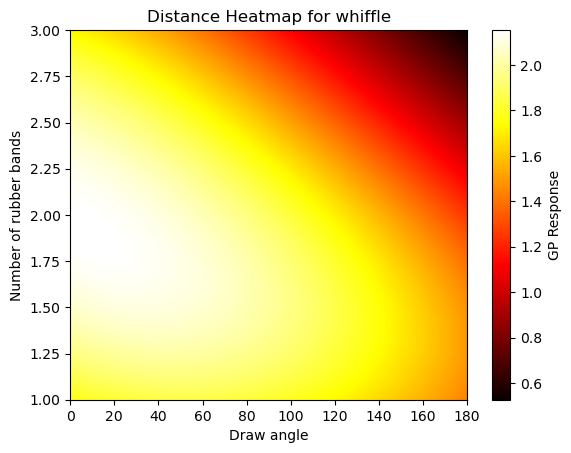

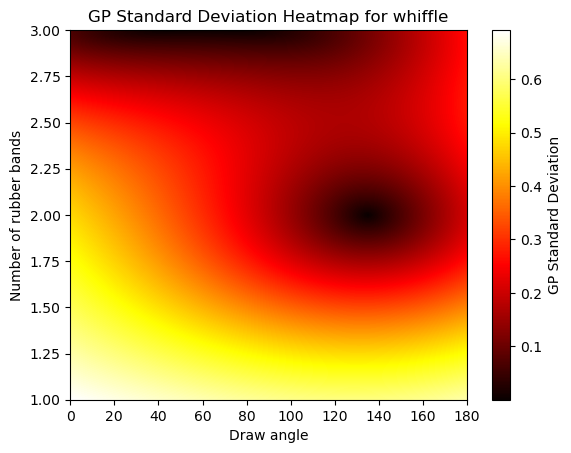

After plotting for one projectile


In [17]:
plot_heatmaps(gp, my_factors)

# suggest a next experiment based on exploration as well

In [18]:
#want to suggest next experiment, let's say with exploration
next_experiment_exploration_2, obj_val_2 = plan_next_experiment(y, my_factors, gp, "Exploration")

In [19]:
next_experiment_exploration_2

,draw_angle,projectile,rubber_bands
0,0.0,whiffle,1.0
